In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

In [36]:
heart = pd.read_csv('datasets/heart.csv')

In [37]:
heart = heart[['sex', 'age', 'thalachh', 'trtbps', 'chol', 'cp', 'fbs', 'restecg', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']]

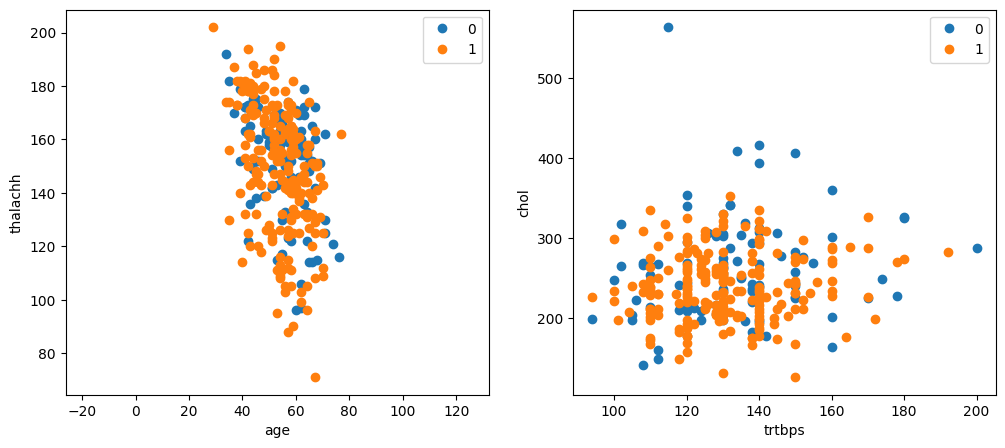

In [38]:
X = heart.iloc[:,1:5]
y = heart['sex']
names = heart.columns[1:5] 
feature_names = heart.columns[0]
targets = np.unique(y)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
for target, target_name in enumerate(targets): # for each species
    X_plot = X[y == targets[target]]
    ax1.plot(X_plot.iloc[:,0], X_plot.iloc[:,1], linestyle='none', marker='o', label=target_name)
    ax2.plot(X_plot.iloc[:,2], X_plot.iloc[:,3], linestyle='none', marker='o', label=target_name)
ax1.set_xlabel(names[0]);ax1.set_ylabel(names[1])
ax2.set_xlabel(names[2]);ax2.set_ylabel(names[3])
ax1.axis('equal') # only left plot, equal x and y unit lengths
ax1.legend();ax2.legend()
plt.show()

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=1)
#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation =
'relu',solver='adam',random_state=1)
#Fitting the training data to the network
classifier.fit(X_train, y_train)
#Predicting y for X_val
y_pred = classifier.predict(X_test)
#Comparing the predictions against the actual observations
confmat = confusion_matrix(y_pred, y_test)
#Printing the accuracy
print("Accuracy of MLPClassifier, confusion matrix:")
print(confmat)


Accuracy of MLPClassifier, confusion matrix:
[[ 5 13]
 [33 71]]


c:\Users\Utente\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
